Andrew Lam

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NYC Data

In [2]:
# Read in NYC data

nyc_data = pd.read_csv('nyc_merged_data.csv', parse_dates = ['starttime', 'stoptime'])
del nyc_data["Unnamed: 0"]
nyc_data["Year Month"] = nyc_data['starttime'].dt.strftime('%Y%m')
nyc_data.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,city,weather key,Pecipitation,max temp,min temp,avg wind,Year Month
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,504,1 Ave & E 15 St,16950,Customer,nyc,20130701,0.84,77,72,3.1,201307
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,459,W 20 St & 11 Ave,19816,Customer,nyc,20130701,0.84,77,72,3.1,201307
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,237,E 11 St & 2 Ave,14548,Subscriber,nyc,20130701,0.84,77,72,3.1,201307
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,499,Broadway & W 60 St,16063,Customer,nyc,20130701,0.84,77,72,3.1,201307
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,410,Suffolk St & Stanton St,19213,Subscriber,nyc,20130701,0.84,77,72,3.1,201307


In [10]:
# Columns for NYC data

list(nyc_data.columns.values)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'end station id',
 'end station name',
 'bikeid',
 'usertype',
 'city',
 'weather key',
 'Pecipitation',
 'max temp',
 'min temp',
 'avg wind',
 'Year Month']

# SF Data

In [3]:
# Read in SF data

sf_data = pd.read_csv('sf_merged_data.csv', parse_dates = ['starttime', 'stoptime'])
del sf_data["Unnamed: 0"]
sf_data["Year Month"] = sf_data['starttime'].dt.strftime('%Y%m')
sf_data.head()

/Users/andrewlam/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tripduration,starttime,start station name,start station id,stoptime,end station name,end station id,bikeid,usertype,city,weather key,max temp,min temp,avg wind,Pecipitation,Year Month
0,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308
1,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308
2,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,Mountain View,2013082994041,80.0,64.0,5.0,0,201308
3,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308
4,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308


In [11]:
# Columns for SF data

list(sf_data.columns.values)

['tripduration',
 'starttime',
 'start station name',
 'start station id',
 'stoptime',
 'end station name',
 'end station id',
 'bikeid',
 'usertype',
 'city',
 'weather key',
 'max temp',
 'min temp',
 'avg wind',
 'Pecipitation',
 'Year Month']

# Overall Ridership

What is the overall trend in ridership by city?

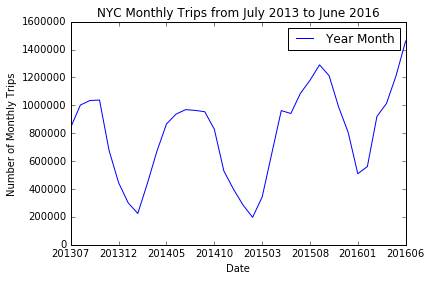

In [22]:
# NYC

nyc_data.groupby(['Year Month']).agg({'Year Month': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Trips")
plt.title("NYC Monthly Trips from July 2013 to June 2016")
# plt.savefig('NYC Trips Per Month Summary.png')

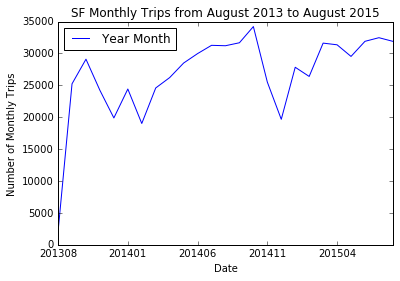

In [21]:
# SF

sf_data.groupby(['Year Month']).agg({'Year Month': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Trips")
plt.title("SF Monthly Trips from August 2013 to August 2015")
# plt.savefig('SF Trips Per Month Summary.png')

Within each city, what is the average number of trips per station per month?

In [47]:
# NYC

nyc_trips_per_station_per_mo = nyc_data.groupby(['start station name', 'Year Month']).size()
nyc_trips_per_station_per_mo = pd.DataFrame(nyc_trips_per_station_per_mo).reset_index()
nyc_trips_per_station_per_mo

# for start_station in nyc_trips_per_station_per_mo[0]:
#     nyc_trips_per_station_per_mo[start_station].mean()

,start station name,Year Month,0
0,1 Ave & E 15 St,201307,4138
1,1 Ave & E 15 St,201308,4583
2,1 Ave & E 15 St,201309,4989
3,1 Ave & E 15 St,201310,5239
4,1 Ave & E 15 St,201311,3932
5,1 Ave & E 15 St,201312,2761
6,1 Ave & E 15 St,201401,1890
7,1 Ave & E 15 St,201402,1319
8,1 Ave & E 15 St,201403,2562
9,1 Ave & E 15 St,201404,4179


In [34]:
# Number of total months 
np.count_nonzero(nyc_data['Year Month'].unique())

36

In [36]:
nyc_data.groupby(['start station name']).size()

start station name
1 Ave & E 15 St                                   154640
1 Ave & E 18 St                                    85445
1 Ave & E 30 St                                   111145
1 Ave & E 44 St                                    67997
1 Ave & E 62 St                                    24601
1 Ave & E 68 St                                    43157
1 Ave & E 78 St                                    27070
10 Ave & W 28 St                                   96270
11 Ave & W 27 St                                  115181
11 Ave & W 41 St                                   95933
11 Ave & W 59 St                                   67928
12 Ave & W 40 St                                  139964
2 Ave & E 31 St                                   132949
2 Ave & E 58 St                                    60746
21 St & 41 Ave                                      1516
21 St & 43 Ave                                      1463
21 St & Queens Plaza North                           351
3 Ave & E 62

In [14]:
# Number of unique start stations 

unique_nyc_start_stations = nyc_data['start station name'].unique()
np.count_nonzero(unique_nyc_start_stations)

527

In [33]:
# SF

sf_data.groupby(['start station name', 'Year Month']).size()

start station name                             Year Month
2nd at Folsom                                  201308         32
                                               201309        603
                                               201310        758
                                               201311        635
                                               201312        523
                                               201401        698
                                               201402        527
                                               201403        649
                                               201404        600
                                               201405        722
                                               201406        742
                                               201407        750
                                               201408        702
                                               201409        694
                                

In [17]:
# Number of unique start stations 

unique_sf_start_stations = sf_data['start station name'].unique()
np.count_nonzero(unique_sf_start_stations)

74

# Trip Times

What is the average trip time by start/stop station?

In [37]:
# NY

# Creating a new column to change units from seconds to minutes
nyc_data['tripduration_min'] = nyc_data['tripduration'].map(lambda x: x/60)

In [5]:
# Average trip time by start station in minutes 
nyc_data.groupby(['start station name'], as_index=False).tripduration_min.mean()

,start station name,tripduration_min
0,1 Ave & E 15 St,12.785604
1,1 Ave & E 18 St,13.089510
2,1 Ave & E 30 St,13.530626
3,1 Ave & E 44 St,15.555993
4,1 Ave & E 62 St,15.486148
5,1 Ave & E 68 St,16.991994
6,1 Ave & E 78 St,19.244034
7,10 Ave & W 28 St,13.685645
8,11 Ave & W 27 St,15.452753
9,11 Ave & W 41 St,15.559211


In [18]:
# Number of unique NYC start stations 

unique_nyc_start_stations = nyc_data['start station name'].unique()
np.count_nonzero(unique_nyc_start_stations)

527

In [19]:
# Number of unique NYC stop stations 

unique_nyc_start_stations = nyc_data['start station name'].unique()
np.count_nonzero(unique_nyc_start_stations)

527

In [21]:
# Permutation formula = nPk = n! / (n-k)!
# How many ways can you choose 2 stations from a group of 527?
# 527P2 = 527! / 525! = 527 * 526 permutations
# 277,202 permutations of NYC start-stop stations

527* 526

277202

In [38]:
# SF

# Creating a new column to change units from seconds to minutes
sf_data['tripduration_min'] = sf_data['tripduration'].map(lambda x: x/60)

In [8]:
# Average trip time by start station in minutes 
sf_data.groupby(['start station name'], as_index=False).tripduration_min.mean()

,start station name,tripduration_min
0,2nd at Folsom,9.695164
1,2nd at South Park,11.464618
2,2nd at Townsend,13.194416
3,5th at Howard,15.455710
4,Adobe on Almaden,20.020618
5,Arena Green / SAP Center,32.732799
6,Beale at Market,14.360890
7,Broadway St at Battery St,13.638542
8,Broadway at Main,41.354229
9,California Ave Caltrain Station,77.133431


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x172d9fcc0>]], dtype=object)

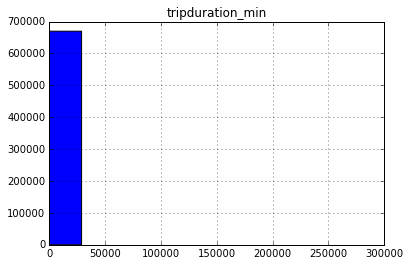

In [49]:
# This is supposed to be a histogram of SF trip durations...not sure how to fix this

sf_data.hist('tripduration_min')

In [22]:
# Number of unique SF start stations 

unique_sf_start_stations = sf_data['start station name'].unique()
np.count_nonzero(unique_sf_start_stations)

74

In [23]:
# Number of unique SF stop stations 

unique_sf_start_stations = sf_data['start station name'].unique()
np.count_nonzero(unique_sf_start_stations)

74

In [24]:
# Assuming all the start and stop stations are the same
# Permutation formula = nPk = n! / (n-k)!
# How many ways can you choose 2 stations from a group of 74?
# 74P2 = 74! / 72! = 74 * 73 permutations
# 5,402 permutations of SF start-stop stations

74 * 73

5402

What is the median trip time?

In [39]:
# NYC

# Units are in minutes 
nyc_data.groupby(['start station name'], as_index=False).tripduration_min.median()

,start station name,tripduration_min
0,1 Ave & E 15 St,9.166667
1,1 Ave & E 18 St,9.833333
2,1 Ave & E 30 St,10.633333
3,1 Ave & E 44 St,12.050000
4,1 Ave & E 62 St,10.700000
5,1 Ave & E 68 St,11.633333
6,1 Ave & E 78 St,12.433333
7,10 Ave & W 28 St,9.566667
8,11 Ave & W 27 St,11.416667
9,11 Ave & W 41 St,11.950000


In [40]:
# SF

# Units are in minutes 
sf_data.groupby(['start station name'], as_index=False).tripduration_min.median()

,start station name,tripduration_min
0,2nd at Folsom,5.933333
1,2nd at South Park,7.116667
2,2nd at Townsend,8.216667
3,5th at Howard,7.350000
4,Adobe on Almaden,5.566667
5,Arena Green / SAP Center,6.416667
6,Beale at Market,7.766667
7,Broadway St at Battery St,8.016667
8,Broadway at Main,4.850000
9,California Ave Caltrain Station,17.433333


What is the range of trip times?

In [17]:
# NYC

# Units are in minutes
nyc_data.groupby(['start station name']).tripduration_min.describe()

start station name                 
1 Ave & E 15 St               count    154640.000000
                              mean         12.785604
                              std         101.063540
                              min           1.000000
                              25%           5.500000
                              50%           9.166667
                              75%          14.266667
                              max       23224.400000
1 Ave & E 18 St               count     85445.000000
                              mean         13.089510
                              std          50.547398
                              min           1.000000
                              25%           6.216667
                              50%           9.833333
                              75%          15.133333
                              max        9836.600000
1 Ave & E 30 St               count    111145.000000
                              mean         13.530626
          

In [18]:
# SF

# Units are in minutes
sf_data.groupby(['start station name']).tripduration_min.describe()

start station name                                  
2nd at Folsom                                  count    15940.000000
                                               mean         9.695164
                                               std         48.203030
                                               min          1.016667
                                               25%          3.950000
                                               50%          5.933333
                                               75%          8.266667
                                               max       4670.466667
2nd at South Park                              count    18496.000000
                                               mean        11.464618
                                               std         40.731020
                                               min          1.000000
                                               25%          5.083333
                                               50%

/Users/andrewlam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x16e234a20>],
 'caps': [<matplotlib.lines.Line2D at 0x16e239cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x16e245c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16e240d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16e234be0>,
  <matplotlib.lines.Line2D at 0x16e239ba8>]}

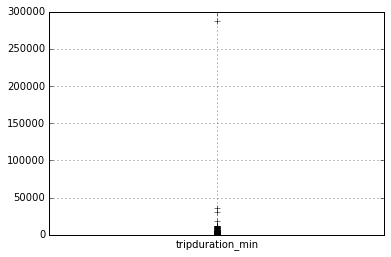

In [51]:
# This is supposed to be a box plot for trip duration in minutes

sf_data.boxplot('tripduration_min')

What is the standard deviation of trip times?

In [ ]:
# See output from describe() above for information on standard deviation